https://github.com/ryonlunar/ds_sparta

Untuk melihat file secara ipynb dan melihat model deployment

# **Judul dan Pengantar**

Analisa response customer terhadap data penjualan dalam sebuah pasar swalayan

- **Nama:** Adhimas Aryo Bimo
- **NIM TPB:** 19623142
- **NIM Jurusan:** 13523051

# **Import Library**

In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sn
import sklearn as sk

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier, LGBMClassifier
from xgboost import XGBClassifier, XGBClassifier
from catboost import CatBoostClassifier, CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,roc_curve, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import optuna
import math
import datetime

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import pickle

# **Pengenalan Data**

Data yang digunakan merupakan data dari sebuah supermarket yang memiliki beberapa fitur, diantaranya:

- **Response (target)**: 1 Jika customer menerima tawaran dari kampanye periklanan sebelumnya, 0 jika tidak menerima
- **ID**: ID yang unik untuk setiap customer
- **Year_Birth**: Tahun kelahiran customer
- **Complain**: 1 Jika customer pernah complain dalam 2 tahun terakhir
- **Dt_Customer**: Tanggal customer daftar/menjadi member dari perusahaan
- **Education**: Level edukasi customer 
- **Marital**: Status pernikahan customer
- **Kidhome**: Jumlah anak kecil dalam rumah customer 
- **Teenhome**: Jumlah remaja dalam rumah customer 
- **Income**: Pendapatan pertahun customer 
- **MntFishProducts**: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
- **MntMeatProducts**: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
- **MntFruits**: Jumlah yang dihabiskan untuk produk buah dalam 2 tahun terakhir
- **MntSweetProducts**: Jumlah yang dihabiskan untuk produk manis dalam 2 tahun terakhir
- **MntWines**: Jumlah yang dihabiskan untuk produk wines dalam 2 tahun terakhir
- **MntGoldProds**: Jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir
- **NumDealsPurchases**: umlah pembelian yang dilakukan dengan diskon
- **NumCatalogPurchases**: Jumlah pembelian yang dilakukan menggunakan katalog (membeli barang yang akan dikirim melalui pos)
- **NumStorePurchases**: Jumlah pembelian yang dilakukan langsung di toko
- **NumWebPurchases**: Jumlah pembelian yang dilakukan langsung di toko
- **NumWebVisitsMonth**: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir
- **Recency**: Jumlah hari sejak pembelian terakhir

Dalam data ini memiliki target yaitu **Response** , untuk memastikan apakah customer menerima tawaran dari kampanye periklanan sebelumnya

# **Pre-EDA**

Untuk mempermudah, saya akan membagi eksplorasi data menjadi 2 bagian, yakni :
- **Pre-EDA** : eksplorasi data sebelum melakukan perubahan pada data (data raw) dan ,
- **Post-EDA** : eksplorasi data setelah melakukan perubahan pada data (setelah *feature engineering*)

### 1. Load Data

In [2]:
train = pd.read_csv('superstore_data.csv')
train.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   6/16/2014        0       189        104              379              111   
1   6/15/2014        0       464          5               64                7   
2   5/13/2014        0       134         11               59               15   
3   11/5/2014        0        10          0                1                0   
4    8/4/2014        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
train.shape

(2240, 22)

Melalui informasi tersebut, kami dapat mengetahui bahwa terdapat **2240 baris** dan **22 kolom (fitur)** pada data

### 2. Describe Data

In [5]:
train.describe()

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

Dapat kita lihat mengenai statistik persebaran data secara singkat

### 3. Missing Value

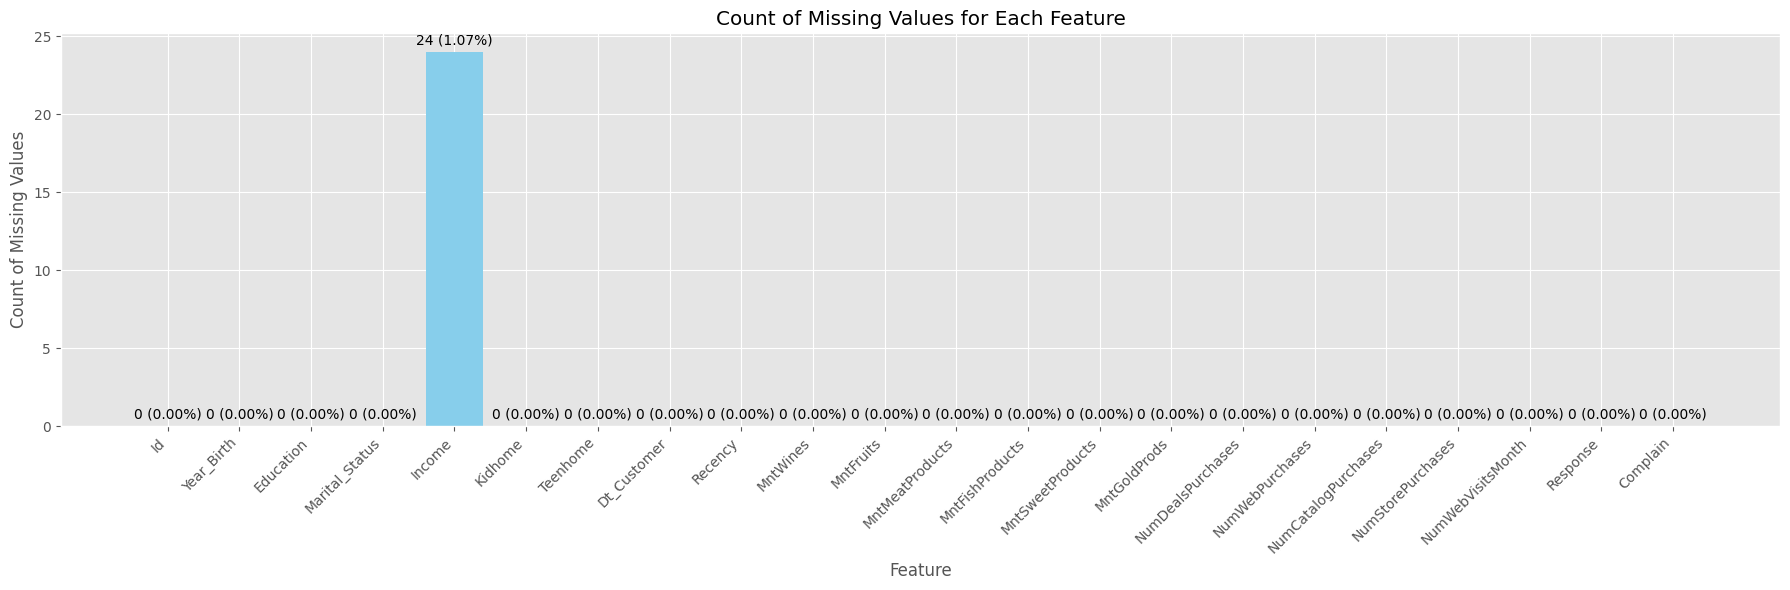

In [6]:
# Calculate the count and percentage of missing values for each feature
missing_values_count = train.isnull().sum()
total_values = len(train)
missing_values_percentage = (missing_values_count / total_values) * 100

# Plot the missing values count
plt.figure(figsize=(18, 6))
bars = plt.bar(missing_values_count.index, missing_values_count.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values for Each Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate each bar with the count and percentage of missing values
for bar, feature_name in zip(bars, missing_values_count.index):
    yval = bar.get_height()
    yperc = missing_values_percentage[feature_name]
    plt.annotate(f'{yval} ({yperc:.2f}%)', 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

Melalui chart ini, kami dapat mengetahui missing values yang ada dalam dataset. Dapat dilihat bahwa, data yang hilang terdapat dalam fitur **Income**, namun yang hilang tidak banyak hanyak 1.07% dari total data yang

### 4. Data Distribution

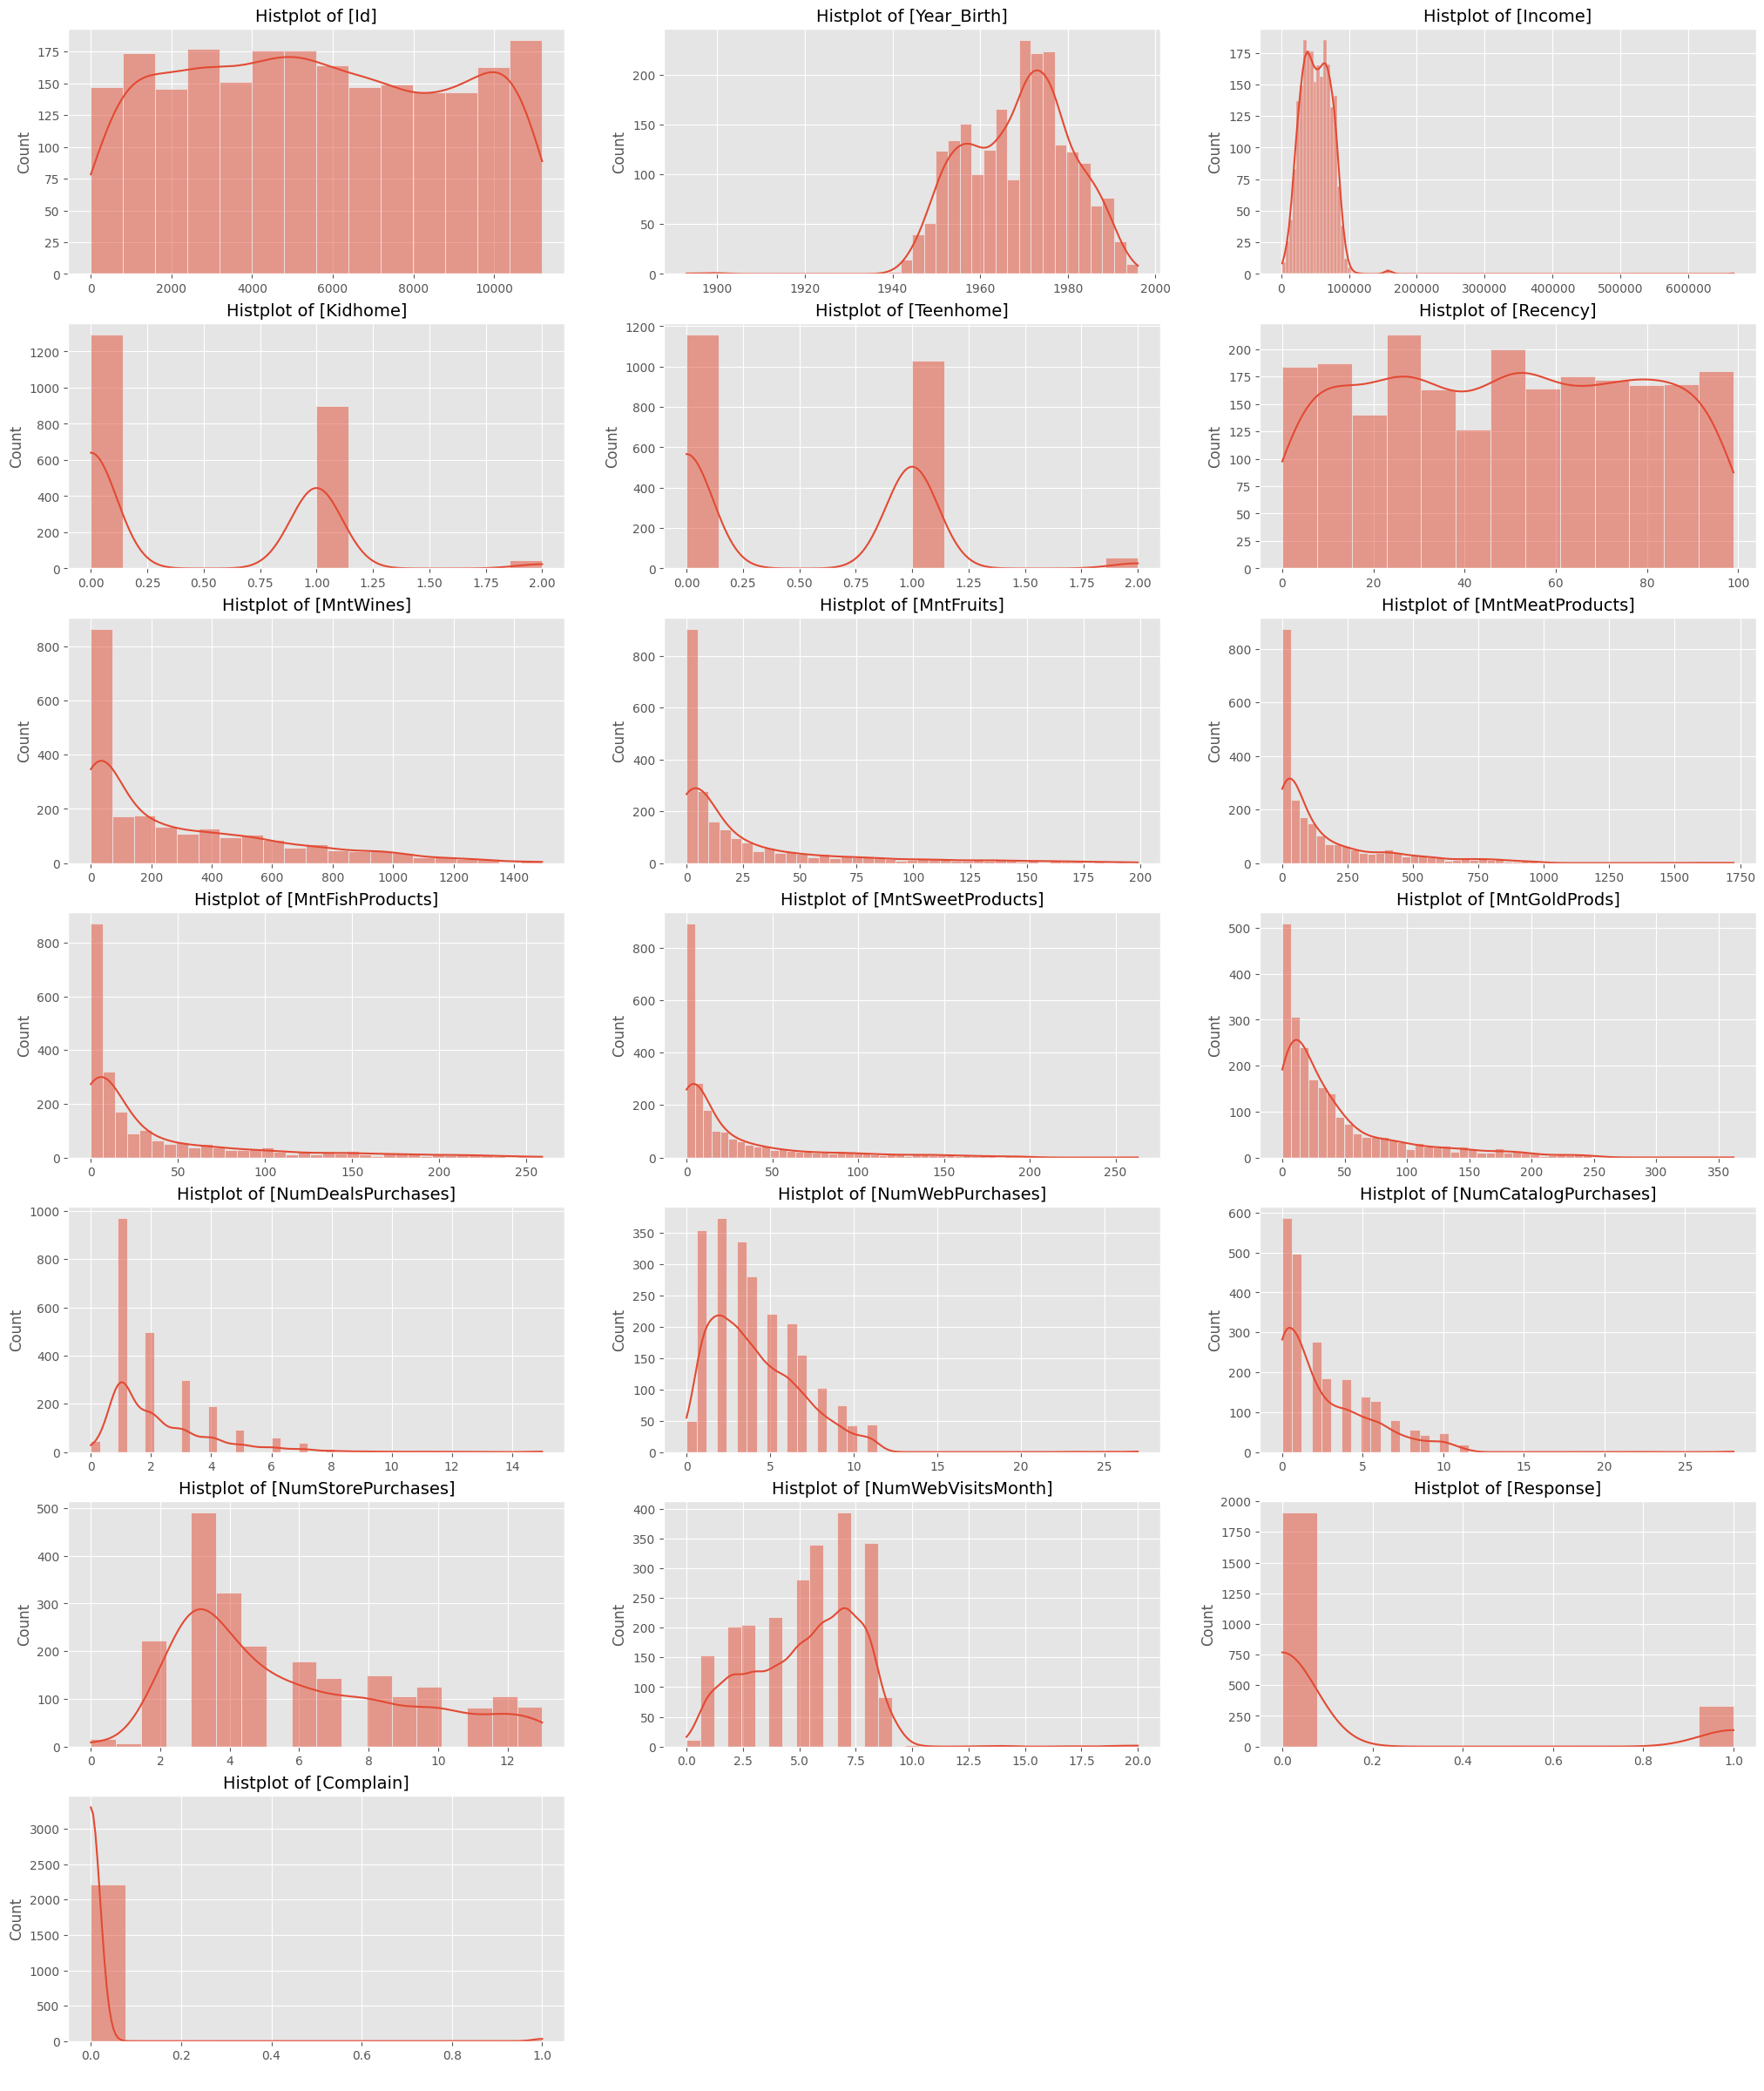

In [7]:
j = 1
plt.figure(figsize=(25,30));

for i in train.columns:
    if train[i].dtype != 'object':
        plt.subplot(7,3,j);
        sns.histplot(data = train, x = train[i],kde = True);
        plt.title('Histplot of ['+ i +']', size = 14);
        plt.xlabel(" ")
        j += 1

Melalui chart ini kami dapat mengetahui distribusi data yang terdapat di dataset. Dapat dilihat bahwa sebaran data tidak ideal, terdepat data yang menumpuk pada sisi sisi chart yang menandakan sebaran data tersebut memiliki *skewness* yang tinggi. Dengan mengetahui hal ini dapat menjadi konsiderasi dalam melakukan transformasi distribusi data.

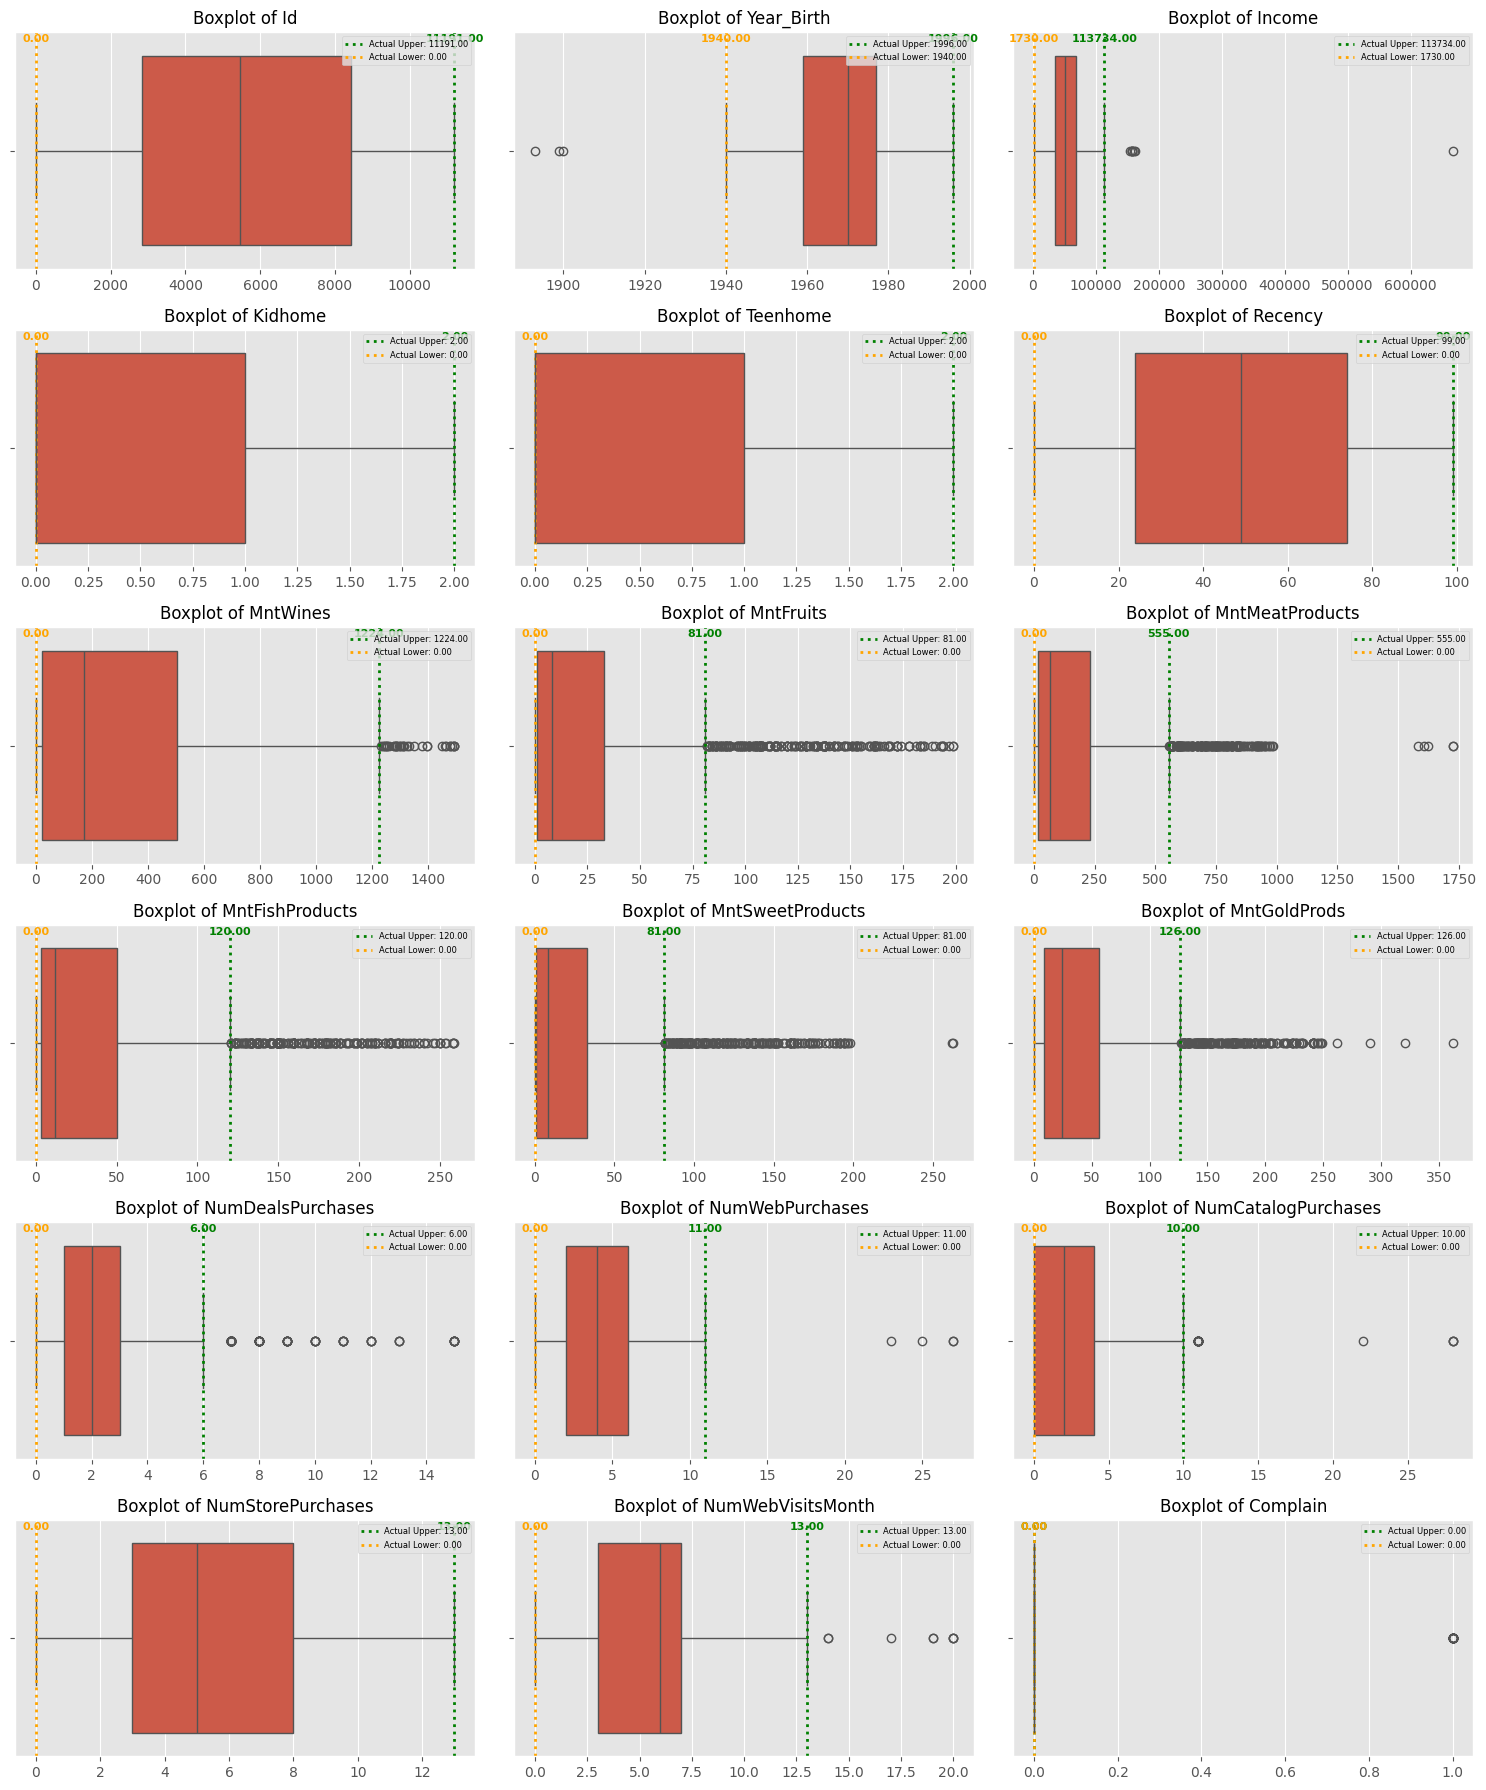

In [8]:
import math

numeric_columns = [i for i in train.columns if pd.api.types.is_numeric_dtype(train[i]) and i != 'Response']
num_features = len(numeric_columns)

nrows = math.ceil(num_features / 3)
ncols = min(num_features, 3)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
axes = axes.flatten()

for j, (feature, ax) in enumerate(zip(numeric_columns, axes)):
    data = train[feature].dropna()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    theoretical_upper = Q3 + 1.5 * IQR
    theoretical_lower = Q1 - 1.5 * IQR
    
    actual_upper = data[data <= theoretical_upper].max()
    actual_lower = data[data >= theoretical_lower].min()

    sns.boxplot(data=train, x=feature, ax=ax)
    
    ax.axvline(actual_upper, color='green', linestyle=':', linewidth=2, 
                label=f'Actual Upper: {actual_upper:.2f}')
    ax.axvline(actual_lower, color='orange', linestyle=':', linewidth=2, 
                label=f'Actual Lower: {actual_lower:.2f}')
    
    y_pos = ax.get_ylim()[1]
    ax.text(actual_upper, y_pos*0.9, f'{actual_upper:.2f}', color='green', ha='center', va='bottom', fontsize=8, weight='bold')
    ax.text(actual_lower, y_pos*0.9, f'{actual_lower:.2f}', color='orange', ha='center', va='bottom', fontsize=8, weight='bold')
    
    ax.legend(loc='upper right', fontsize=6)
    ax.set_title(f'Boxplot of {feature}', size=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes[num_features:]:
    ax.remove()

plt.tight_layout()
plt.show()

Melalui chart box-plot, dapat dilihat lebih jelas mengenai pencilan yang terdapat dalam data. Hal ini juga dapat menjadi konsiderasi dalam melakukan transformasi distribusi data. 

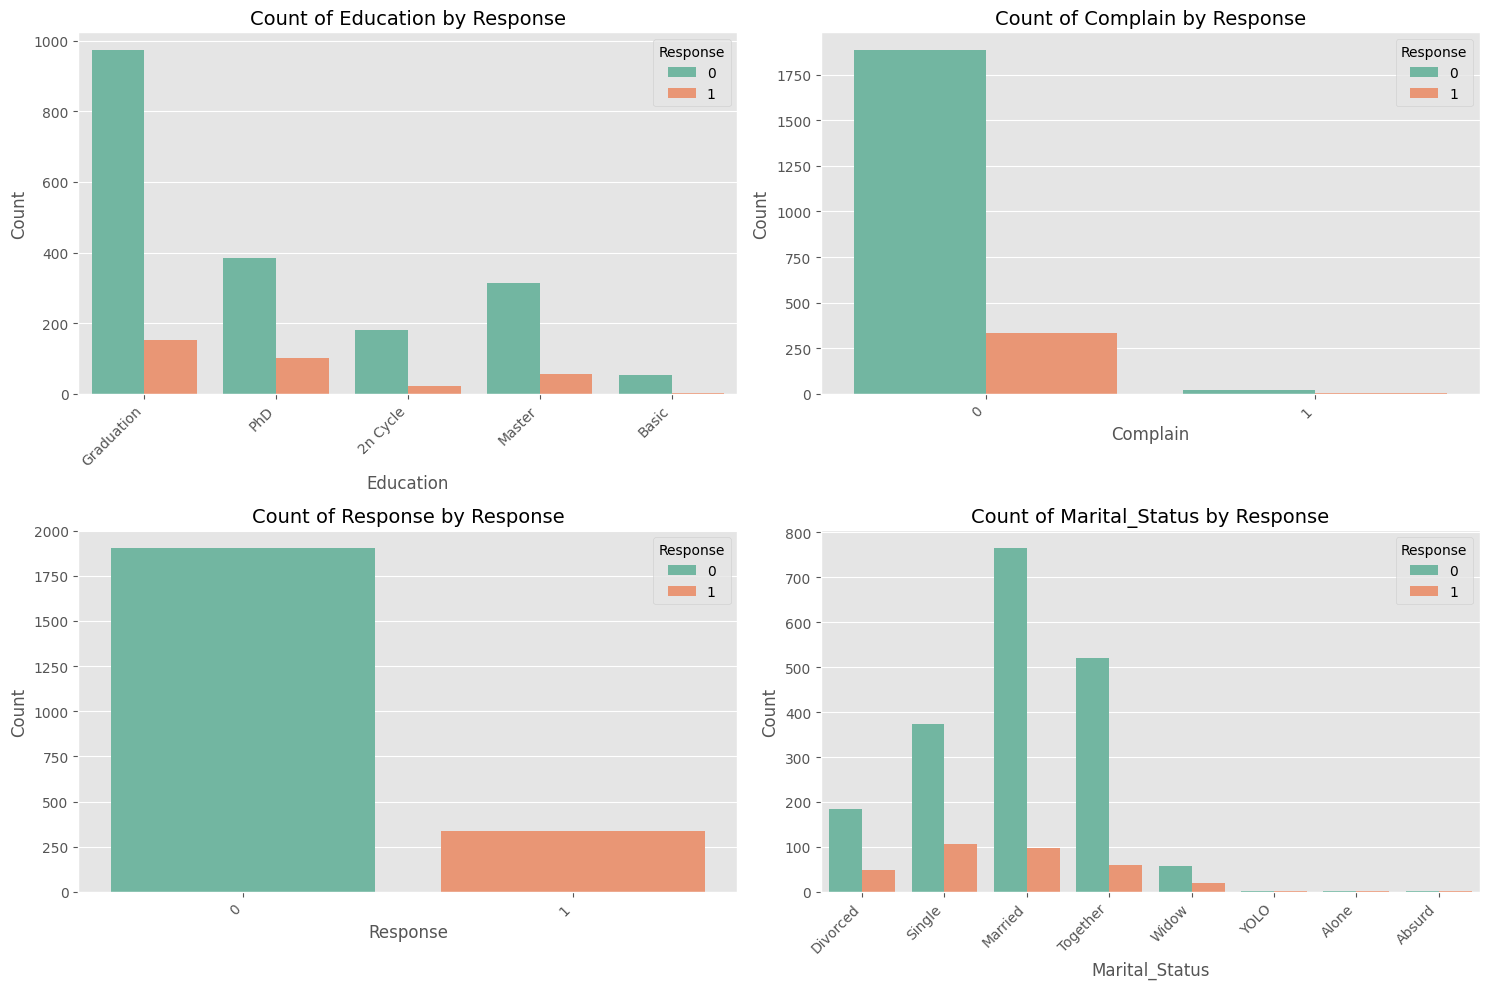

In [9]:
# List of categorical features (excluding the target feature if it's also categorical)
categorical_columns = ['Education', 'Complain', 'Response', 'Marital_Status']

plt.figure(figsize=(15, 10))

# Loop through each categorical feature to create subplots
for i, feature in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=train, x=feature, hue='Response', palette='Set2')
    plt.title(f'Count of {feature} by Response', size=14)
    plt.xlabel(feature, size=12)
    plt.ylabel('Count', size=12)
    plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Chart ini merupakan distribusi persebaran data dan perbandingannya dengan target untuk data kategorikal. Terdapat hal menarik di **Marital_Status**. Dapat dilihat ada data yang kategorinya berbeda namun memiliki makna yang sama sehingga perlu diatasi di *feature engineering*.

Selain itu, Target di data ini (**Response**) memiliki jumlah data yang tidak seimbang (*imbalance*) sehingga melakukan *balancing* dapat menjadi pertimbangan dalam eksperimen pembuatan model.

### 5. Pair Plot

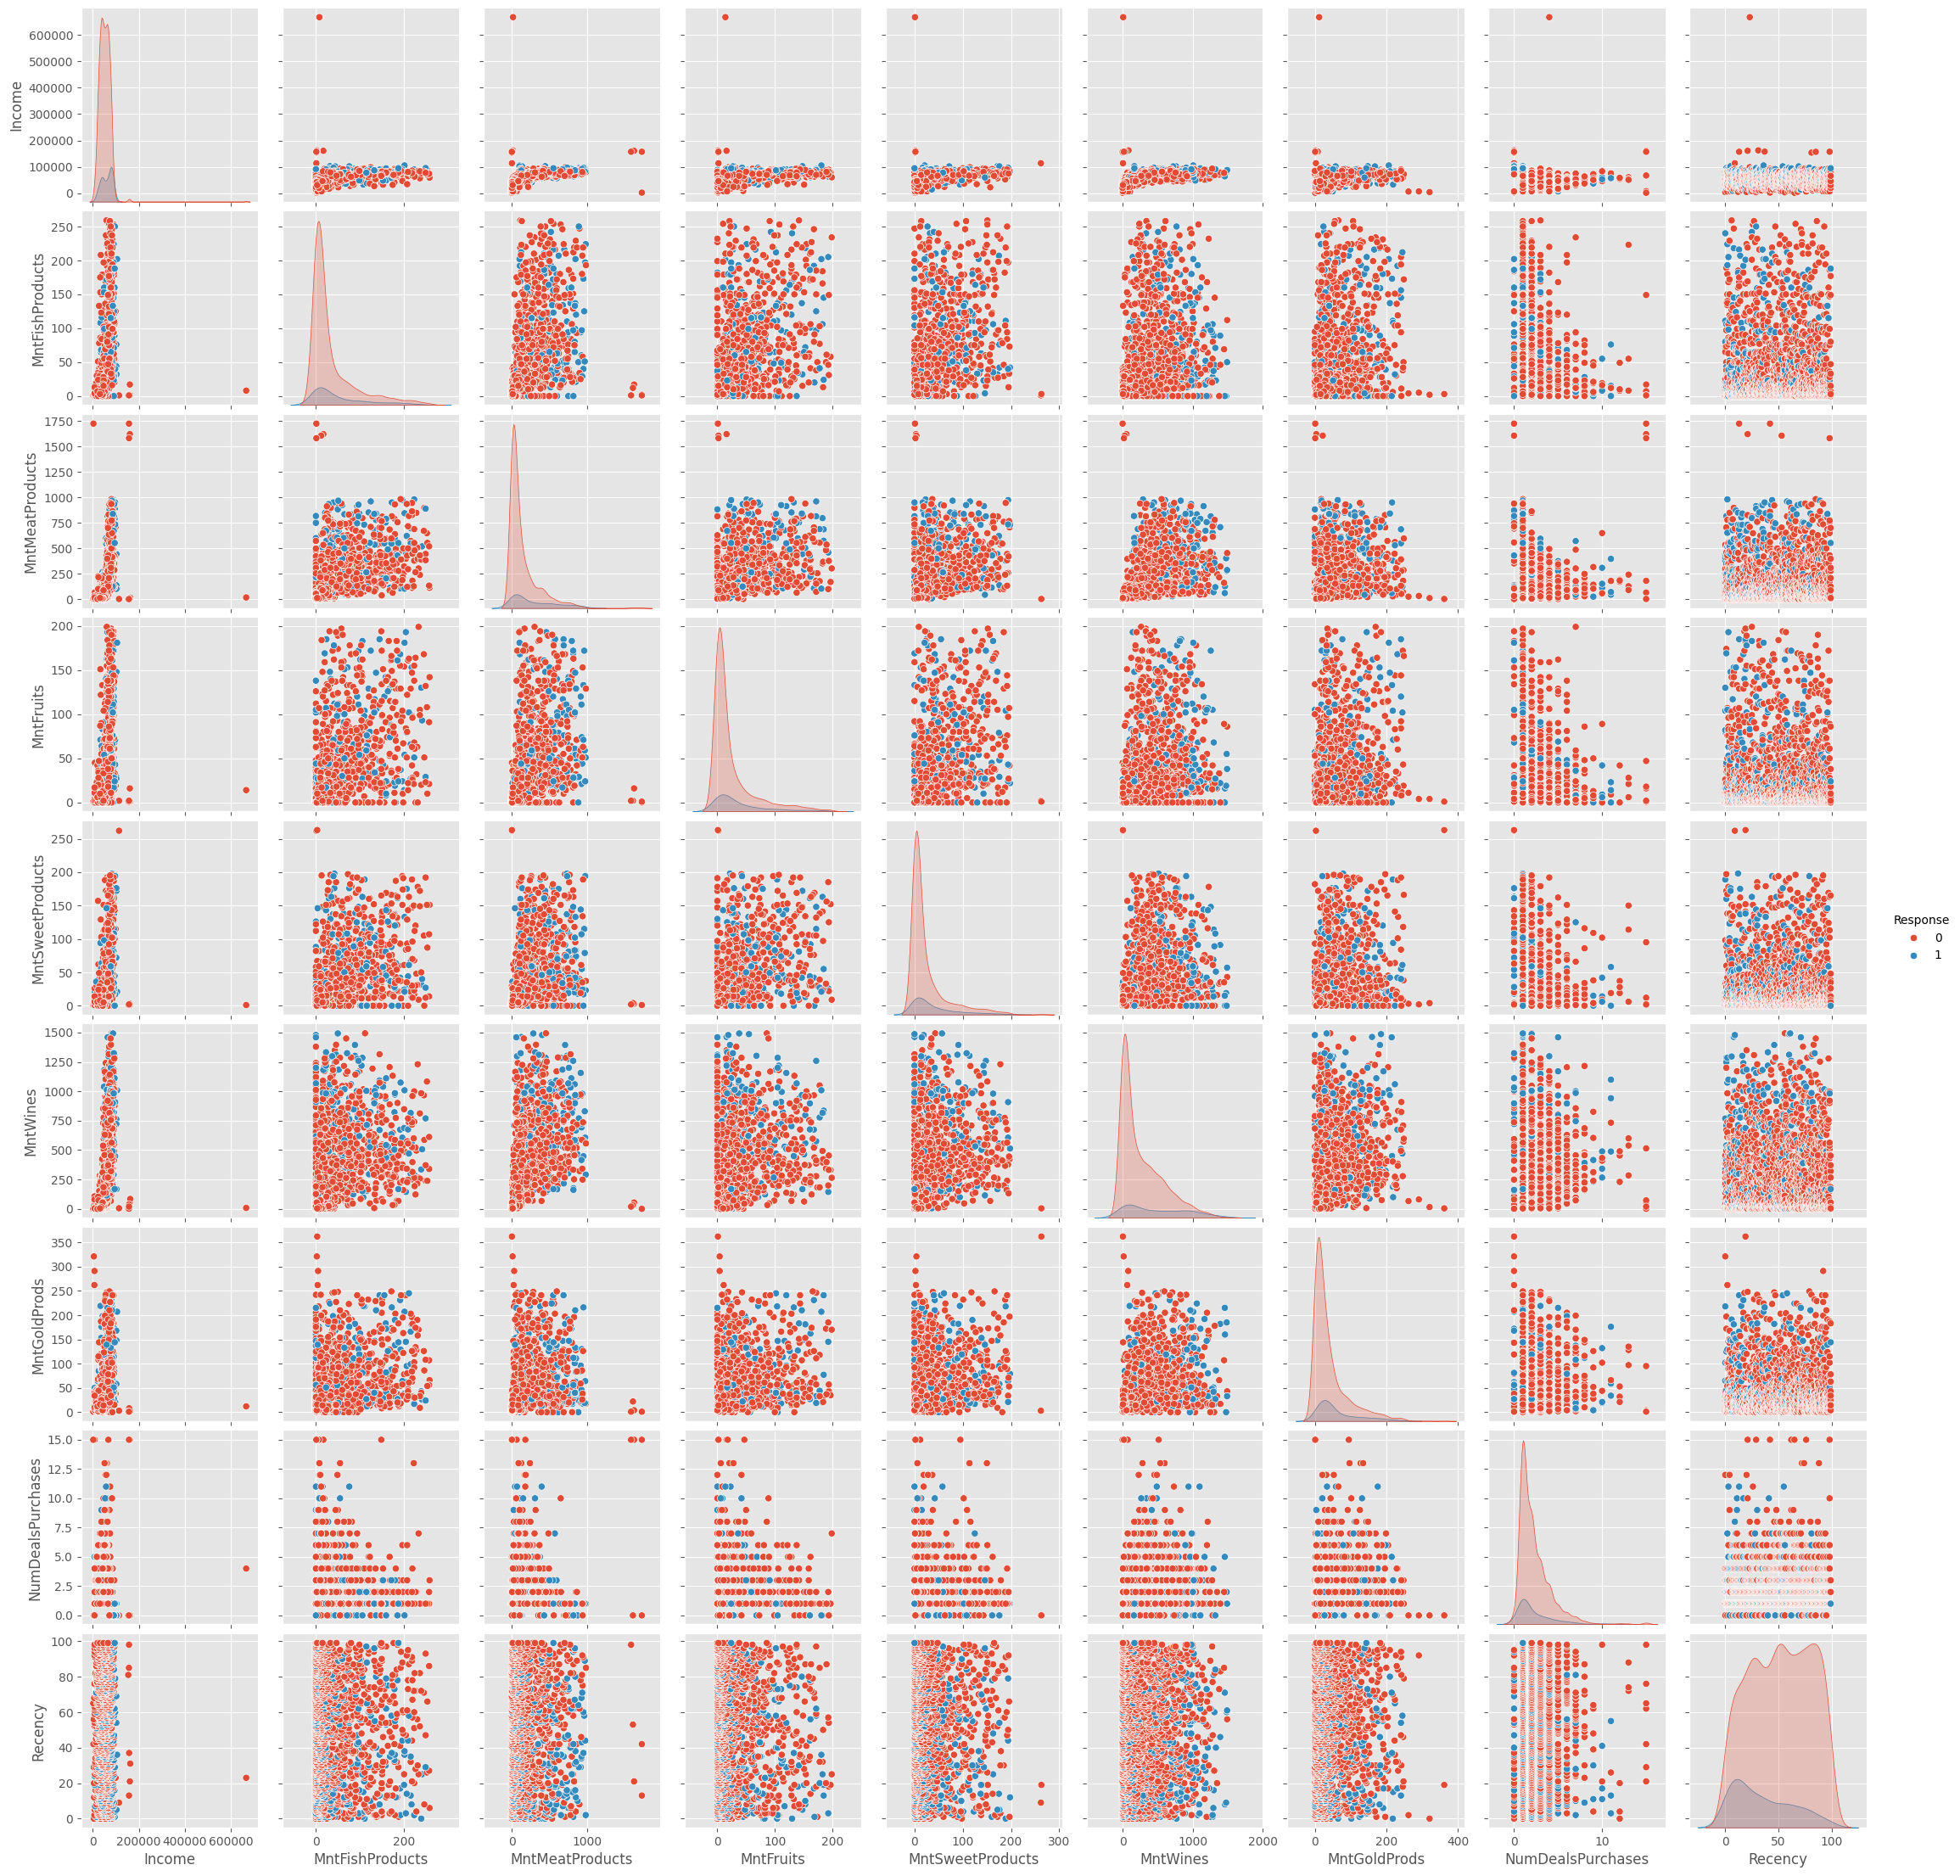

In [10]:
# Select a subset of columns for the pair plot
pairplot_columns = ['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 
                    'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'Recency', 'Response']

# Plot pair plot
sns.pairplot(train[pairplot_columns], hue='Response')
plt.show()

Melalui chart Pair Plot, kami dapat mengetahui hubungan antara fitur numerikal di data. Hal ini dilakukan untuk mengetahui kemungkinan data yang dapat dilakukan *clustering* atau tidak

### 6. Correlation Matrix

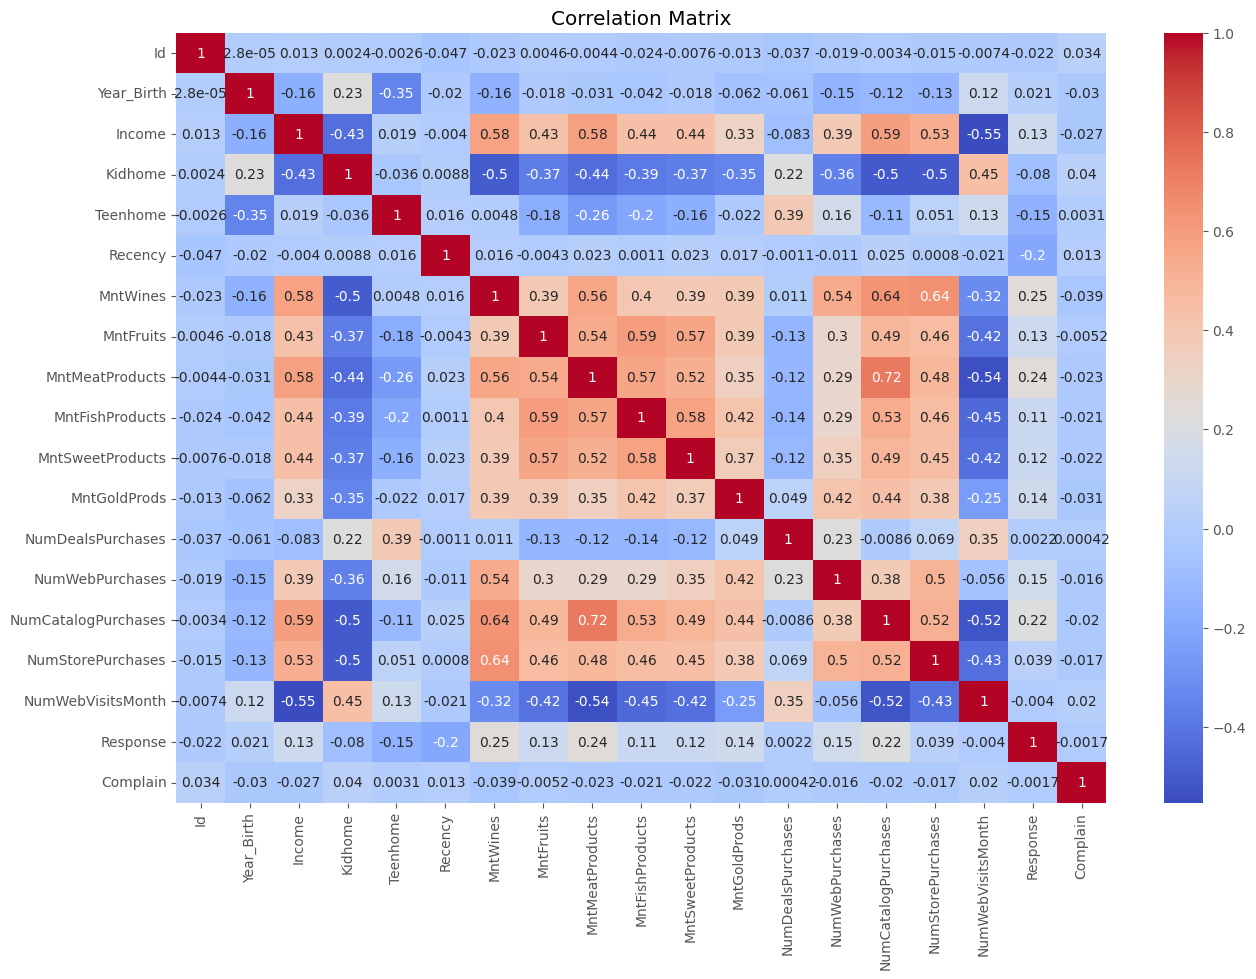

In [11]:
# Calculate correlation matrix
correlation_matrix = train.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Mirip seperti Pair Plot, melalui Correlation Matrix kami dapat melihat relasi pada tiap fitur. Dilihat bahwa Jumlah Products (Mnt__) memiliki relasi yang mirip antara satu sama lain. Begitu pula dengan Jumlah Pembelian (Num___). Hal ini sangat berguna dalam pembuatan fitur nantinya. Bisa dilakukan dengan pembuatan fitur baru untuk merepresentasikan semua fitur yang saling berkaitan dengan tujuan mengurangi multikolineritas fitur.

# **Data Preperation**

### Handling Outliers

In [12]:
def handling_outliers(X:pd.DataFrame) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Handling Outliers Values processing started.")
    df = X.copy()
    for i in df.columns:
        if df[i].dtype != 'object' :
            data = df[i].dropna()
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            theoretical_upper = Q3 + 1.5 * IQR
            theoretical_lower = Q1 - 1.5 * IQR
            actual_upper = data[data <= theoretical_upper].max()
            actual_lower = data[data >= theoretical_lower].min()
            df[i] = np.where(df[i] > actual_upper, actual_upper, df[i])
            df[i] = np.where(df[i] < actual_lower, actual_lower, df[i])
    print(f"[{datetime.datetime.now()}] Handling Outliers Values processing completed successfully.")
    return df

Fungsi ini digunakan untuk mengubah pencilan menjadi suatu nilai berdasarkan nilai maksimum dibawah IQR atau nilai minimum diatas IQR

### Handling Missing Values

In [13]:
def handling_missing(X:pd.DataFrame)->pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Handling Missing Values processing started.")    
    df = X.copy()
    df['Income']=df['Income'].fillna(df['Income'].median())
    print(f"[{datetime.datetime.now()}] Handling Missing Values processing completed successfully.")
    return df

Fungsi ini digunakan untuk mengatasi NaN values di dataset

### Feture Engineering

In [14]:
def feature_engineering(X:pd.DataFrame) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Feature Engineering processing started.")
    df = X.copy()
    df['Age'] = datetime.datetime.now().year - df['Year_Birth']
    df['AvgMnt'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']) / 6
    df['AvgNum'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']) / 4
    df['TotKids'] = df['Kidhome'] + df['Teenhome']
    df['Weeks_Lastbuy'] = df['Recency'] // 7
    df["Income_Score"] = pd.qcut(df['Income'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype('category')
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')
    df['Weeks_Enrollment'] = (datetime.datetime.now() - df['Dt_Customer']).dt.days // 7
    df['Income_PerCapita'] = df['Income'] / (df['TotKids'] + 1)
    print(f"[{datetime.datetime.now()}] Feature Engineering processing completed successfully.")
        
    return df

Fungsi ini digunakan untuk membuat fitur-fitur baru atau menyederhanakan distribusi suatu fitur

### Feature Dropping

In [15]:
def feature_dropping(X:pd.DataFrame) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Feature Dropping processing started.")
    df = X.copy()
    df = df.drop(['Id',
                'Year_Birth',
                'Kidhome', 
                'Teenhome', 
                'Recency',
                'MntMeatProducts',
                'MntFishProducts',
                'MntSweetProducts',
                'MntFruits',
                'MntGoldProds',
                'MntWines',
                'NumDealsPurchases',
                'Dt_Customer',
                'Complain',
                    ],
                    axis=1)
    print(f"[{datetime.datetime.now()}] Feature Dropping processing completed successfully.")
    return df

### Feature Encoding

In [16]:
education_map = {
    'PhD':4,
    'Master':3,
    'Graduation':2,
    '2n Cycle':1,
    'Basic':0
}
marital_map = {
    'Married':2,
    'Together':1,
    'Single':0,
    'Divorced':3,
    'Widow':4
}

In [17]:
def feature_encoding(X:pd.DataFrame) -> pd.DataFrame:
    print(f"[{datetime.datetime.now()}] Feature Encoding processing started.")
    df = X.copy()
    df.loc[df['Marital_Status'].isin(['YOLO', 'Alone', 'Absurd']), 'Marital_Status'] = 'Single'
    df['Education'] = df['Education'].map(education_map).astype('category')
    df['Marital_Status'] = df['Marital_Status'].map(marital_map).astype('category')
    df['Complain'] = df['Complain'].astype('category')
    print(f"[{datetime.datetime.now()}] Feature Encoding processing completed successfully.")
    return df

Fungsi ini digunakan untuk menumerisasikan nilai kategorikal dalam data

### Data Pipelining

In [18]:
X,y = train.drop('Response', axis=1), train['Response']
X = feature_dropping(feature_engineering(feature_encoding(handling_outliers(handling_missing(X)))))

[2024-08-10 22:35:35.983767] Handling Missing Values processing started.
[2024-08-10 22:35:35.986759] Handling Missing Values processing completed successfully.
[2024-08-10 22:35:35.986759] Handling Outliers Values processing started.
[2024-08-10 22:35:36.046600] Handling Outliers Values processing completed successfully.
[2024-08-10 22:35:36.046600] Feature Encoding processing started.
[2024-08-10 22:35:36.054578] Feature Encoding processing completed successfully.
[2024-08-10 22:35:36.054578] Feature Engineering processing started.
[2024-08-10 22:35:36.066544] Feature Engineering processing completed successfully.
[2024-08-10 22:35:36.066544] Feature Dropping processing started.
[2024-08-10 22:35:36.067542] Feature Dropping processing completed successfully.


In [19]:
X.head()

Education Marital_Status   Income  NumWebPurchases  NumCatalogPurchases  \
0         2              3  84835.0                4                    4   
1         2              0  57091.0                7                    3   
2         2              2  67267.0                3                    2   
3         2              1  32474.0                1                    0   
4         2              0  21474.0                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Age      AvgMnt  AvgNum  TotKids  \
0                  6                  1   54  161.166667    3.75        0   
1                  7                  5   63   96.166667    4.50        0   
2                  5                  2   66   41.833333    2.75        1   
3                  2                  7   57    1.833333    1.00        2   
4                  2                  7   35   15.166667    2.00        1   

   Weeks_Lastbuy Income_Score  Weeks_Enrollment  Income_PerCapita  
0              0            5               529      84835.000000  
1              0            3               529      57091.000000  
2              0            4               534      33633.500000  
3              0            2               509      10824.666667  
4              0            1               522      10737.000000

# **Post-EDA**

### 1. Data Distribution

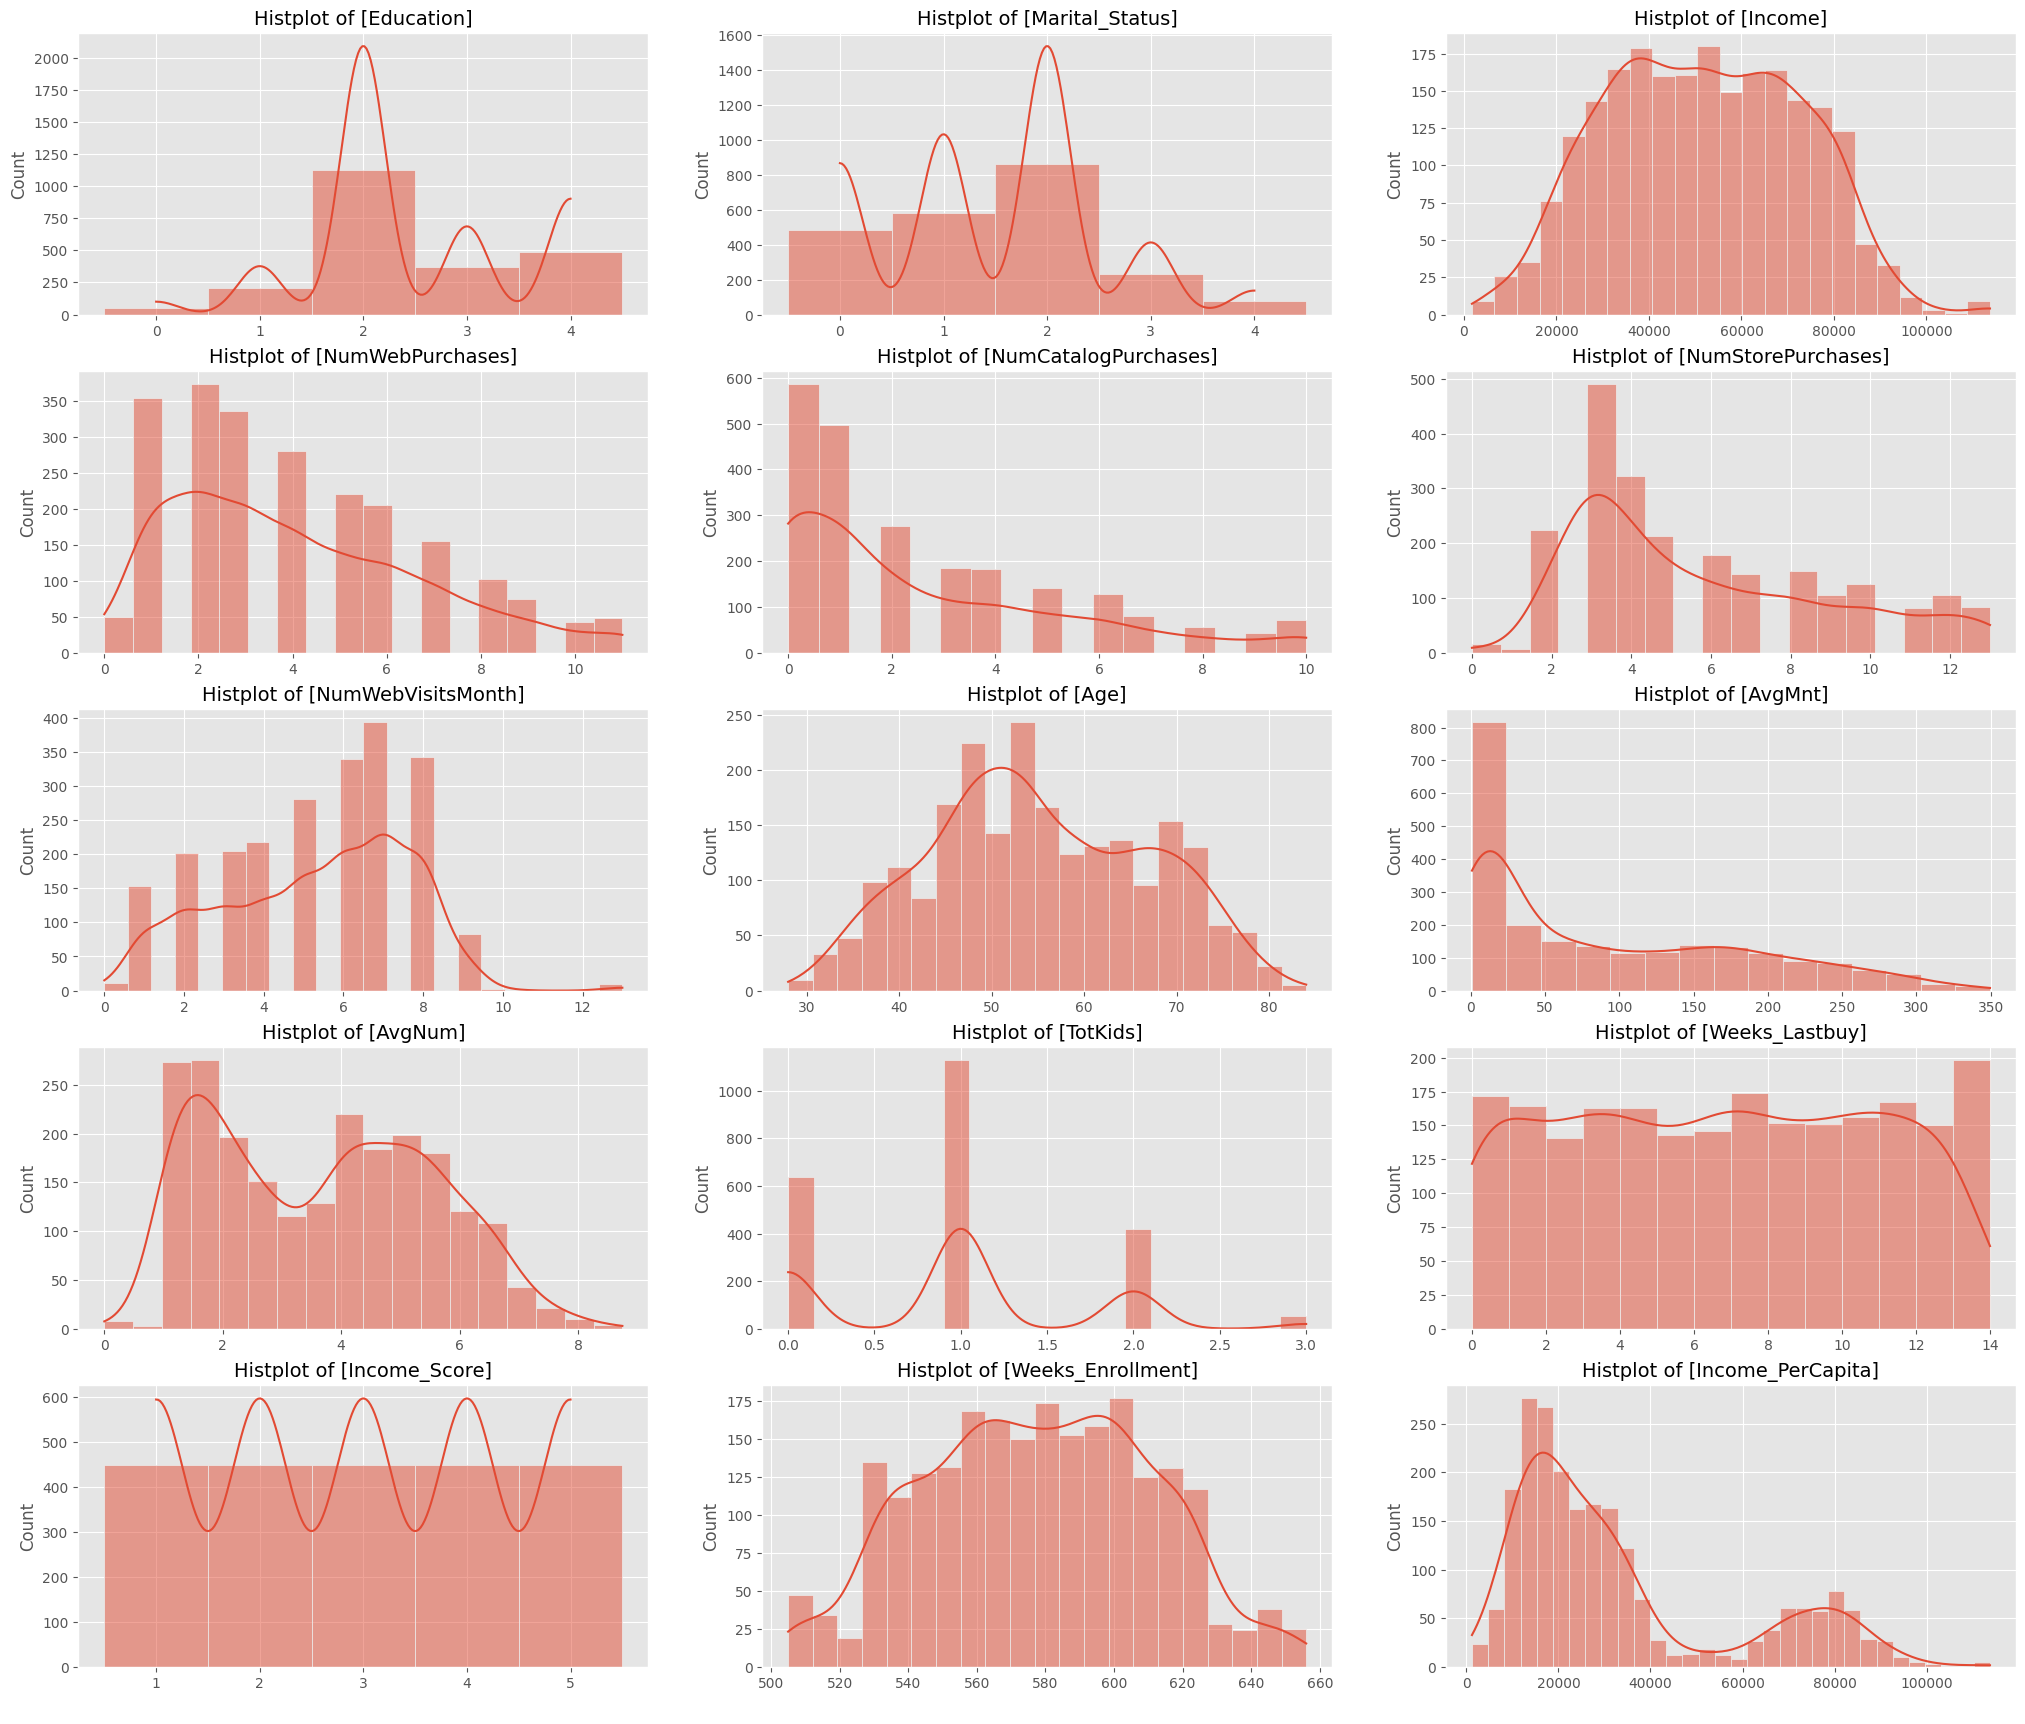

In [20]:
j = 1
plt.figure(figsize=(25,30));

for i in X.columns:
    if X[i].dtype != 'object':
        plt.subplot(7,3,j);
        sns.histplot(data = X, x = X[i],kde = True);
        plt.title('Histplot of ['+ i +']', size = 14);
        plt.xlabel(" ")
        j += 1

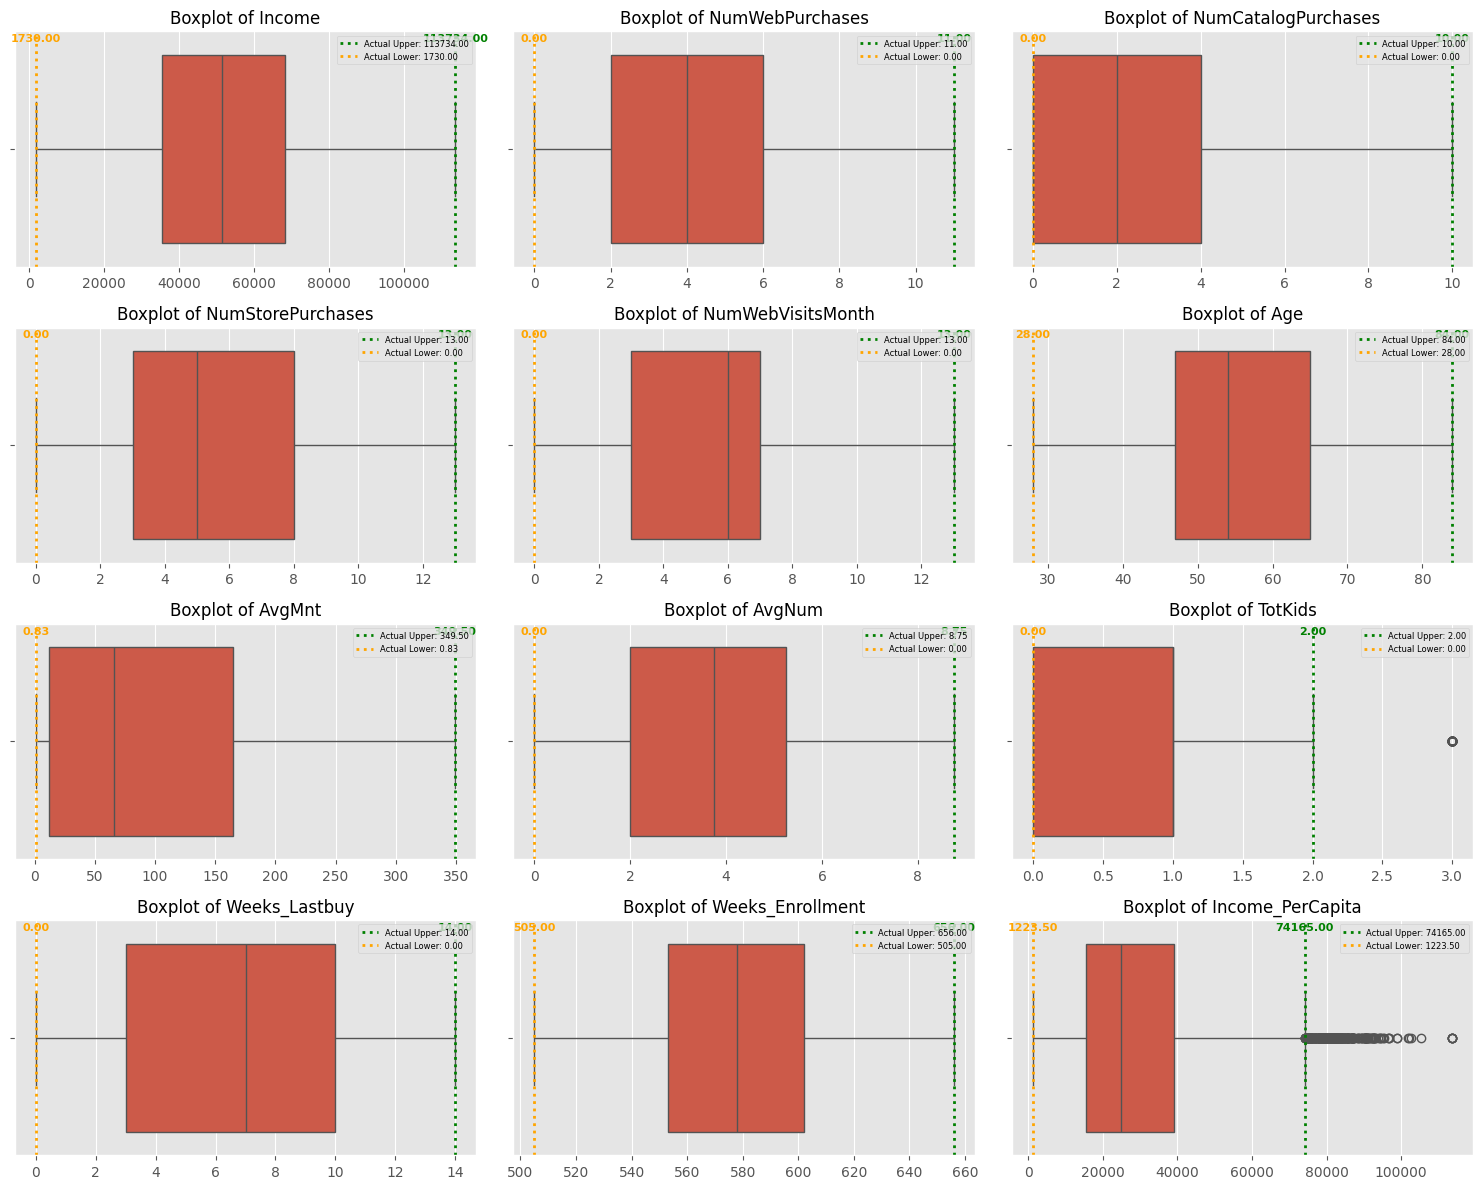

In [21]:
import math

numeric_columns = [i for i in X.columns if pd.api.types.is_numeric_dtype(X[i]) and i != 'Response']
num_features = len(numeric_columns)

nrows = math.ceil(num_features / 3)
ncols = min(num_features, 3)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
axes = axes.flatten()

for j, (feature, ax) in enumerate(zip(numeric_columns, axes)):
    data = X[feature].dropna()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    theoretical_upper = Q3 + 1.5 * IQR
    theoretical_lower = Q1 - 1.5 * IQR
    
    actual_upper = data[data <= theoretical_upper].max()
    actual_lower = data[data >= theoretical_lower].min()

    sns.boxplot(data=X, x=feature, ax=ax)
    
    ax.axvline(actual_upper, color='green', linestyle=':', linewidth=2, 
                label=f'Actual Upper: {actual_upper:.2f}')
    ax.axvline(actual_lower, color='orange', linestyle=':', linewidth=2, 
                label=f'Actual Lower: {actual_lower:.2f}')
    
    y_pos = ax.get_ylim()[1]
    ax.text(actual_upper, y_pos*0.9, f'{actual_upper:.2f}', color='green', ha='center', va='bottom', fontsize=8, weight='bold')
    ax.text(actual_lower, y_pos*0.9, f'{actual_lower:.2f}', color='orange', ha='center', va='bottom', fontsize=8, weight='bold')
    
    ax.legend(loc='upper right', fontsize=6)
    ax.set_title(f'Boxplot of {feature}', size=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes[num_features:]:
    ax.remove()

plt.tight_layout()
plt.show()

Setelah melakukan *feature engineering* terlihat bahwa pencilan-pencilan dalam data mulai membaik, namun tidak untuk **Income_PerCapita** dan **TotKids**, hal ini karena kedua fitur tersebut tercipta dari fitur yang telah dilakukan penanganan pencilan dan terbentuknya nilai diluar maksimum interquartil terjadi secara organik.

### 2. Correlation Matrix

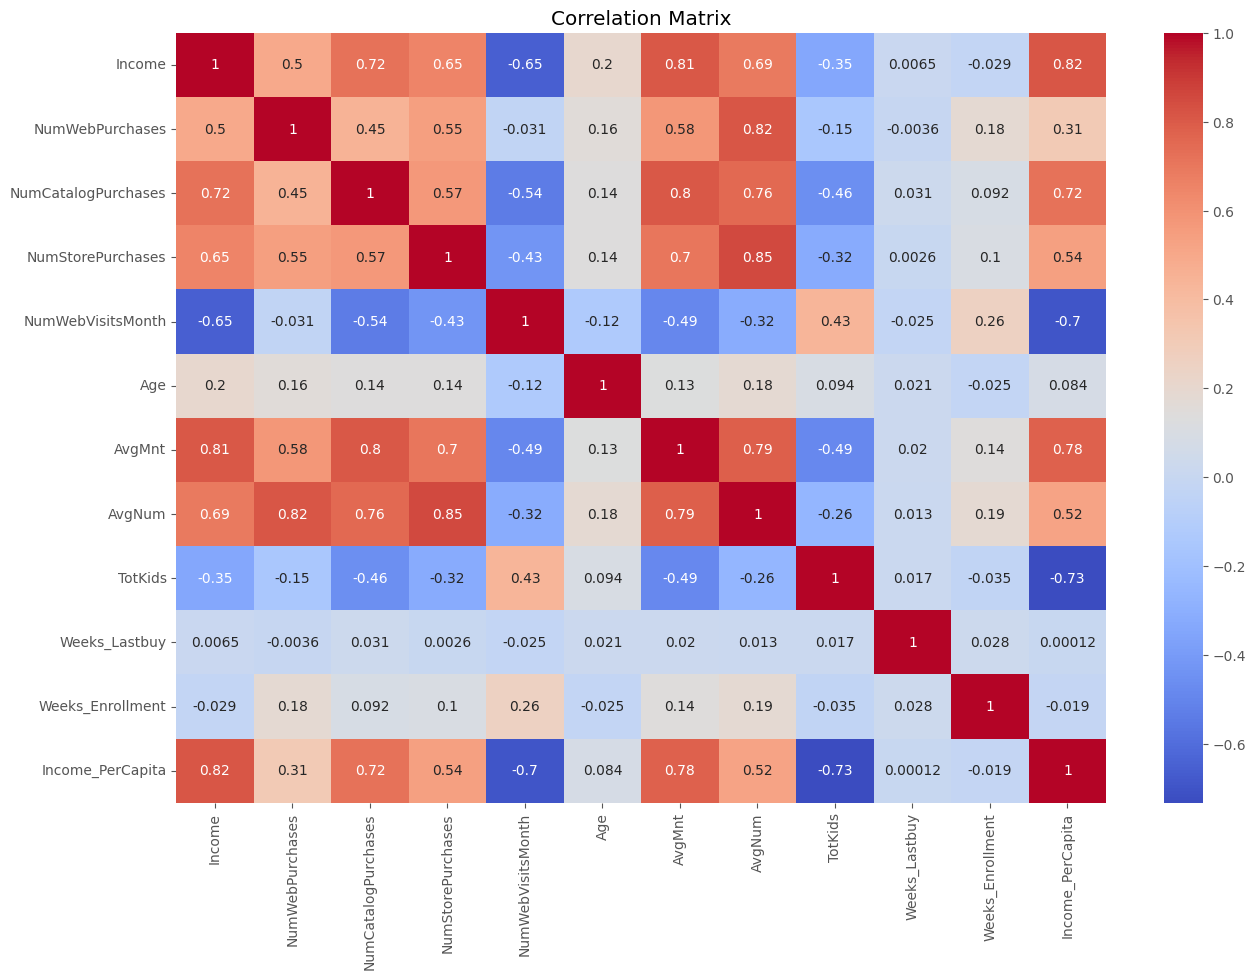

In [22]:
# Calculate correlation matrix
correlation_matrix = X.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Setelah melakukan evaluasi model, ternyata fitur **Num__** tidak bisa serta merta dihilangkan begitu saja dari data walaupun telah dilakukan pembuatan fitur baru (**AvgNum**). Skor model menurun ketika **Num__** ditiadakan. Hal ini kemungkinan model terlalu tinggi mengkonsiderasi fitur **Num__** sehingga mengalami overfit pada fitur tersebut, penambahan **AvgNum** akan membuat nilai **Num__** menjadi lebih general sehingga model dapat lebih baik menyeimbangkan fitting pada fitur.

Hal ini juga berlaku pada **Income** dan **Income_PerCapita**

# **Modelling**

Untuk modelling, evaluasi metrik yang saya gunakan adalah **Balanced Accuracy Score** dan **ROC**. BAC saya gunakan karena data yang terdapat pada model sangat imbalance, saya ingin model dapat mempertimbangkan kedua kelas secara sama rata. Untuk ROC saya gunakan untuk memastikan seberapa baik model dalam membedakan kedua jenis kelas, dalam hal ini adalah 1 dan 0.

In [23]:
cat = [X.columns.get_loc(col) for col in X.select_dtypes(include=['category']).columns]

In [24]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

cat = [X.columns.get_loc(col) for col in X.select_dtypes(include=['category']).columns]

# Define a function to evaluate different sampling strategies using Random Forest with best parameters
def evaluate_sampling_strategy(sampling_strategy,name):
    print(f'========{name}==========')
    # Create a pipeline with sampling and model
    models = {
    'CatBoost': CatBoostClassifier(cat_features=cat, random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(cat_features=cat,random_state=42, verbose=-1),
    'XGBoost': XGBClassifier(enable_categorical=True, random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for name, model in models.items():
        print(f'====={name}=====')
        pipeline = ImbPipeline([
            ('sample', sampling_strategy),
            ('classifier', model)
        ])

        # Perform cross-validation and return the average balanced accuracy score
        scores = []
        rocs = []
        for train_index, val_index in skf.split(X,y):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_val)

            bac = balanced_accuracy_score(y_val, y_pred)
            roc = roc_auc_score(y_val, y_pred)   
            scores.append(bac)
            rocs.append(roc)
        for i, score in enumerate(scores):
            print(f'Fold {i+1}: {score:.3f}')
        print(f'Balanced roc: {np.mean(scores):.3f} +- {np.std(scores):.3f}')
        print(f'roc: {np.mean(roc):.3f} +- {np.std(roc):.3f}')
    return np.mean(scores)


# Define sampling strategies
sampling_strategies = {
    "RandomUnderSampler (100%)": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

sampling_results = {name: evaluate_sampling_strategy(strategy,name) for name, strategy in sampling_strategies.items()}
sampling_results

========RandomUnderSampler (100%)==========
=====CatBoost=====
Fold 1: 0.770
Fold 2: 0.780
Fold 3: 0.796
Fold 4: 0.798
Fold 5: 0.786
Balanced roc: 0.786 +- 0.010
roc: 0.786 +- 0.000
=====LightGBM=====
Fold 1: 0.751
Fold 2: 0.786
Fold 3: 0.783
Fold 4: 0.777
Fold 5: 0.754
Balanced roc: 0.770 +- 0.015
roc: 0.754 +- 0.000
=====XGBoost=====
Fold 1: 0.759
Fold 2: 0.769
Fold 3: 0.781
Fold 4: 0.768
Fold 5: 0.776
Balanced roc: 0.771 +- 0.007
roc: 0.776 +- 0.000
=====ExtraTrees=====
Fold 1: 0.757
Fold 2: 0.783
Fold 3: 0.831
Fold 4: 0.777
Fold 5: 0.764
Balanced roc: 0.782 +- 0.026
roc: 0.764 +- 0.000
=====RandomForest=====
Fold 1: 0.759
Fold 2: 0.759
Fold 3: 0.796
Fold 4: 0.755
Fold 5: 0.765
Balanced roc: 0.767 +- 0.015
roc: 0.765 +- 0.000


{'RandomUnderSampler (100%)': 0.7665245450277498}

Dalam eksperimen, saya menggunakan tree model. Model dievaluasi melalui stratified kfold lalu diberikan hasil ROC dan balanced accuracy score untuk mengetahui performa model.

**Pertama**, data akan di split menjadi 5 bagian dan distribusinya disesuaikan berdasarkan label **Responses**.

**Kedua**, pipeline model akan melakukan fitting terhadap data yang telah di split dan dilakukan Undersampling sebesar 1:1 terhadap label

**Ketiga**, model akan dilatih berdasarkan data undersampling lalu dievaluasi dengan data validasi menggunakan 2 metrik, yakni ROC dan Balanced Accuracy Score

**Keempat**, iterasi evaluasi model dilakukan 5 kali dan ditampilkan rata-rata sebagai evaluasi model secara keseluruhan.

Terdapat 3 model yang dapat ditingkatkan lebih baik, yakni Catboost, XGBoost, dan LGBM.

# **Hyperparameter Tuning**

Melakukan hyperparameter tuning pada 3 model terbaik, lalu parameter terbaik akan dianalisa kembali

In [25]:
# def objective(trial):
#     # Define the search space for CatBoostClassifier hyperparameters
#     params = {
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'depth': trial.suggest_int('depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 20.0),
#         'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
#         'od_type': 'Iter',
#         'od_wait': trial.suggest_int('od_wait', 10, 50),
#         'eval_metric': 'BalancedAccuracy',
#     }

#     # Initialize the CatBoostClassifier with the hyperparameters
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     model = CatBoostClassifier(**params, verbose=0,cat_features=cat, random_state=42)
    
#     pipeline = ImbPipeline([
#             ('sample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
#             ('classifier', model)
#         ])
    
#     # Perform cross-validation and return the average balanced accuracy score
#     scores = []
#     rocs = []
#     for train_index, val_index in skf.split(X,y):
#         X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#         pipeline.fit(X_train, y_train)
#         y_pred = pipeline.predict(X_val)

#         bac = balanced_accuracy_score(y_val, y_pred) 
#         roc = roc_auc_score(y_val, y_pred)
#         rocs.append(roc)
#         scores.append(bac)

#     return (np.mean(scores) + np.mean(rocs)) / 2

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters and best score
# best_params = study.best_params
# best_score = study.best_value

# print("Best Parameters:", best_params)
# print("Best Balanced Accuracy Score:", best_score)

In [26]:
# # Define the objective function for Optuna
# def objective(trial):
#     # Define the search space for LGBMClassifier hyperparameters
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
#         'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 20.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
#         'random_state': 42
#     }

#     # Initialize the LGBMClassifier with the hyperparameters
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     model = LGBMClassifier(**params, verbose=-1,cat_features=cat)
    
#     pipeline = ImbPipeline([
#             ('sample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
#             ('classifier', model)
#         ])
    
#     # Perform cross-validation and return the average balanced accuracy score
#     scores = []
#     rocs = []
#     for train_index, val_index in skf.split(X,y):
#         X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#         pipeline.fit(X_train, y_train)
#         y_pred = pipeline.predict(X_val)

#         bac = balanced_accuracy_score(y_val, y_pred) 
#         roc = roc_auc_score(y_val, y_pred)
#         rocs.append(roc)
#         scores.append(bac)

#     return (np.mean(scores) + np.mean(rocs)) / 2

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters and best score
# best_params = study.best_params
# best_score = study.best_value

# print("Best Parameters:", best_params)
# print("Best Balanced Accuracy Score:", best_score)

In [27]:
# # Define the objective function for Optuna
# def objective(trial):
#     # Define the search space for XGBClassifier hyperparameters
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 20.0),
#         'gamma': trial.suggest_float('gamma', 1e-3, 10.0, log=True),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'random_state': 42,
#         'use_label_encoder': False,
#         'eval_metric': 'logloss'  # Necessary to avoid the warning about label encoding
#     }

#     # Initialize the XGBClassifier with the hyperparameters
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     model = XGBClassifier(**params, enable_categorical=True)
    
#     pipeline = ImbPipeline([
#             ('sample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
#             ('classifier', model)
#         ])
    
#     # Perform cross-validation and return the average balanced accuracy score
#     scores = []
#     rocs = []
#     for train_index, val_index in skf.split(X,y):
#         X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#         pipeline.fit(X_train, y_train)
#         y_pred = pipeline.predict(X_val)

#         bac = balanced_accuracy_score(y_val, y_pred) 
#         roc = roc_auc_score(y_val, y_pred)
#         rocs.append(roc)
#         scores.append(bac)

#     return (np.mean(scores) + np.mean(rocs)) / 2

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters and best score
# best_params = study.best_params
# best_score = study.best_value

# print("Best Parameters:", best_params)
# print("Best Balanced Accuracy Score:", best_score)

Parameter Hasil Tuning

In [28]:
cb_params = {'iterations': 788, 'depth': 3, 'learning_rate': 0.08703119595776956, 'l2_leaf_reg': 0.010233203434942802, 'border_count': 106, 'scale_pos_weight': 1.0115056725590514, 'random_strength': 0.030866518485695885, 'od_wait': 13,"cat_features": cat , "random_state":42, "verbose":0, 'eval_metric': 'BalancedAccuracy'} 

lgbm_params = {'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.03979396529734462, 'num_leaves': 117, 'min_child_samples': 47, 'subsample': 0.7285609359945582, 'colsample_bytree': 0.8221172942376949, 'scale_pos_weight': 1.0917393713914247, 'reg_alpha': 0.03948519059294612, 'reg_lambda': 0.002111971985469423, 'verbose':-1,'cat_features':cat, 'random_state':42}

xgb_params = {'n_estimators': 911, 'max_depth': 10, 'learning_rate': 0.01008622517831401, 'subsample': 0.515377692996265, 'colsample_bytree': 0.7084834978968305, 'scale_pos_weight': 1.787288493466539, 'gamma': 0.022438562649095856, 'reg_alpha': 0.013403893191795404, 'reg_lambda': 0.031659711600163475, 'min_child_weight': 6, 'random_state': 42,'use_label_encoder': False,'eval_metric': 'logloss', 'enable_categorical': True}



In [29]:
models = {
    'CatBoost': CatBoostClassifier(**cb_params),
    'LightGBM': LGBMClassifier(**lgbm_params),
    'XGBoost': XGBClassifier(**xgb_params),
    }
    
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    print(f'====={name}=====')

    pipeline = ImbPipeline([
                ('sample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
                ('classifier', model)
            ])
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    rocs = []
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)

        bac = balanced_accuracy_score(y_val, y_pred)
        roc = roc_auc_score(y_val, y_pred)   
        scores.append(bac)
        rocs.append(roc)
    for i, score in enumerate(scores):
        print(f'Fold {i+1}: {score:.3f}')
    print(f'Balanced Acc: {np.mean(scores):.3f} +- {np.std(scores):.3f}')
    print(f'ROC: {np.mean(rocs):.3f} +- {np.std(rocs):.3f}')

=====CatBoost=====
Fold 1: 0.789
Fold 2: 0.785
Fold 3: 0.800
Fold 4: 0.804
Fold 5: 0.768
Balanced Acc: 0.789 +- 0.013
ROC: 0.789 +- 0.013
=====LightGBM=====
Fold 1: 0.777
Fold 2: 0.801
Fold 3: 0.827
Fold 4: 0.784
Fold 5: 0.770
Balanced Acc: 0.792 +- 0.020
ROC: 0.792 +- 0.020
=====XGBoost=====
Fold 1: 0.777
Fold 2: 0.798
Fold 3: 0.814
Fold 4: 0.782
Fold 5: 0.782
Balanced Acc: 0.790 +- 0.014
ROC: 0.790 +- 0.014


Setelah melakukan tuning, terlihat peningkatan kinerja model dari segi BAC maupun ROC. Karena **LGBM** memiliki score ROC dan AUC yang paling tinggi, maka digunakan model tersebut sebagai model Final.

# **Confusion Metrics**

=====LGBM=====


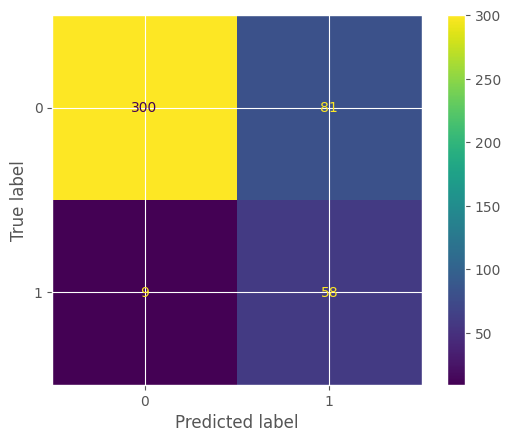

In [30]:
models = {
    'LGBM': LGBMClassifier(**lgbm_params),}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'====={name}=====')

    pipeline = ImbPipeline([
                ('sample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
                ('classifier', model)
            ])
    
    scores = []
    rocs = []
    j = 0

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)

        bac = balanced_accuracy_score(y_val, y_pred)
        roc = roc_auc_score(y_val, y_pred)
        scores.append(bac)
        rocs.append(roc)
        j += 1

        if j == 3:
            # Display confusion matrix for the third fold
            cm = confusion_matrix(y_val, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot()
            plt.show()

Berdasarkan apa yang kita lihat, model menjadi lebih optimis untuk memilih 1.  Walaupun hal tersebut sesuai dengan harapan saya, tetapi yang diprediksi oleh model terlalu optimis. Hal ini bisa dilihat dengan cukup banyaknya model memprediksi label 1 yang sebenarnya merupakan label 0. Untuk itu, perlu penanganan lebih lanjut mengenai evaluasi model dan juga metrics yang digunakan untuk pelatihan model agar dapat memberikan output yang lebih baik.

# **Final Model**

In [31]:
final_model = ImbPipeline([
                ('sample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
                ('classifier',LGBMClassifier(**lgbm_params))
            ])

display(final_model)

Pipeline(steps=[('sample',
                 RandomUnderSampler(random_state=42, sampling_strategy=1)),
                ('classifier',
                 LGBMClassifier(cat_features=[0, 1, 12],
                                colsample_bytree=0.8221172942376949,
                                learning_rate=0.03979396529734462, max_depth=5,
                                min_child_samples=47, n_estimators=350,
                                num_leaves=117, random_state=42,
                                reg_alpha=0.03948519059294612,
                                reg_lambda=0.002111971985469423,
                                scale_pos_weight=1.0917393713914247,
                                subsample=0.7285609359945582, verbose=-1))])

# **Save Model**

In [32]:
final_model.fit(X,y)

# Specify the filename for the saved model
filename = 'lgbm_model.pkl'

# Open a file in binary write mode and use pickle to dump the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# **Website**

untuk model deployment dapat mengunjungi 

https://github.com/ryonlunar/ds_sparta